# Sklearn BenchMark Result on one dataset for comparison with custom scratch implementaion 

In [78]:
# https://machinelearningmastery.com/anomaly-detection-with-isolation-forest-and-kernel-density-estimation/

In [79]:
from numpy import quantile, random, where
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

In [80]:
random.seed(3)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))

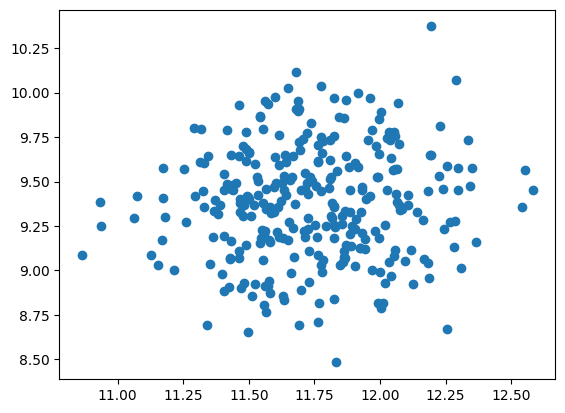

In [81]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [82]:
IF = IsolationForest(n_estimators=100, contamination=.03)
predictions = IF.fit_predict(X)

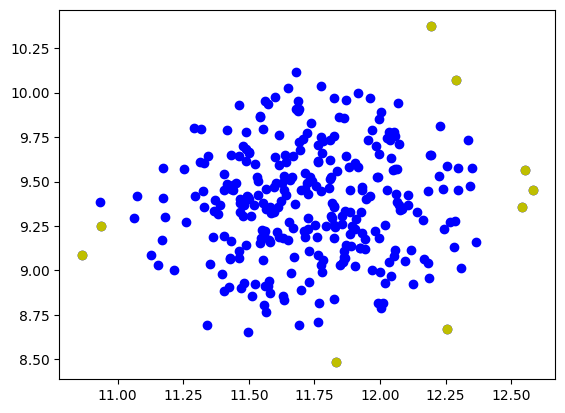

In [83]:
outlier_index = where(predictions==-1)
values = X[outlier_index]

fig1, ax1 = plt.subplots()
ax1.scatter(X[:,0], X[:,1], color='b')
ax1.scatter(values[:,0], values[:,1], color='y')
plt.show()

# Custom algo implementation on same dataset, to know what to expect from my implementation of the same algo. 

In [84]:
def isolation_forest(X, n_trees=100, max_depth=None, contamination=0.01):
    """
    Isolation Forest algorithm for anomaly detection.
    
    Parameters:
    X (numpy.ndarray): Input data matrix of shape (n_samples, n_features).
    n_trees (int): Number of trees in the forest.
    max_depth (int): Maximum depth of each tree.
    contamination (float): Proportion of outliers in the data.
    
    Returns:
    numpy.ndarray: Anomaly scores for each sample.
    """
    n_samples, n_features = X.shape
    
    # Initialize trees
    trees = []
    for _ in range(n_trees):
        tree = _build_tree(X, max_depth)
        trees.append(tree)
    
    # Compute anomaly scores
    scores = np.zeros(n_samples)
    for i in range(n_samples):
        path_lengths = []
        for tree in trees:
            path_length = _path_length(X[i], tree)
            path_lengths.append(path_length)
        scores[i] = 2**(-np.mean(path_lengths) /c(n_features))
    
    # Adjust scores based on contamination
    threshold = np.percentile(scores, (1-contamination)*100)
    anomalies = scores < threshold
    
    return anomalies

def _build_tree(X, max_depth=None, depth=0):
    """
    Recursively build an isolation tree.
    """
    n_samples, n_features = X.shape
    
    if n_samples <= 1 or depth == max_depth:
        return None
    
    # Select a random feature and a random split value
    feature = np.random.randint(n_features)
    split = np.random.uniform(np.min(X[:, feature]), np.max(X[:, feature]))
    
    # Split the data based on the selected feature and value
    left_idx = X[:, feature] < split
    right_idx = ~left_idx
    
    # Recursively build left and right subtrees
    left_tree = _build_tree(X[left_idx], max_depth, depth + 1)
    right_tree = _build_tree(X[right_idx], max_depth, depth + 1)
    
    return (feature, split, left_tree, right_tree)

def _path_length(x, tree):
    """
    Compute the path length of a sample in an isolation tree.
    """
    if tree is None:
        return 0 # mutated
    
    feature, split, left_tree, right_tree = tree
    
    if x[feature] < split: # threshold value
        return 1 + _path_length(x, left_tree)
    else:
        return 1 + _path_length(x, right_tree)

def c(n):
    """
    Average path length of unsuccessful search in a binary search tree.
    """
    if n <= 1:
        return 0
    else:
        return 2*(np.log(n-1)+0.5772156649) - (2*(n-1))/n


In [85]:
from numpy import quantile, random, where
import numpy as np
import matplotlib.pyplot as plt


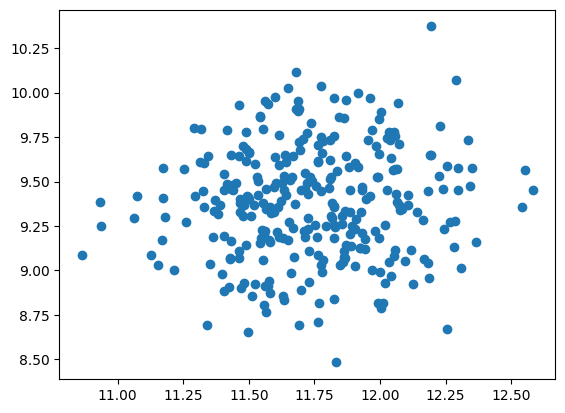

In [86]:
random.seed(3)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

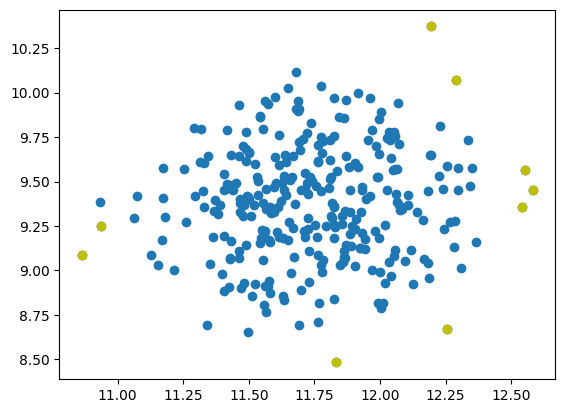

In [87]:
# Example usage
predictions = isolation_forest(X, n_trees=10, max_depth=None, contamination=0.03)
outlier_index = where(predictions==True)
X[outlier_index]

plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()

# okay so at this point i found out that my custom algo is working exactly as same as sklearn's, so now i can try creating animation of IF's internal working's simulation.